# Week 11: Correlation Coefficient and Straight-Line Regression Analysis (Interactive Lab)

This notebook accompanies Week 11 lecture materials.  
You will analyze the relationship between the number of beers consumed and Blood Alcohol Concentration (BAC).

**Instructions**
1. Make sure the Excel file `bac.xlsx` is in your working directory.  
2. Run each code cell in order.  
3. Answer **Questions 1–10** in the Markdown cells provided thorugh Blacklboard Python Exercise Quiz 4.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

plt.rcParams['figure.figsize'] = (8,5)
sns.set_style("whitegrid")

## Quick Concept Check 💡

1. What does the correlation coefficient (r) measure?  
2. How can you tell the direction and strength of a linear relationship from r?  
3. What are the main differences between correlation and regression?  
4. What does the slope in a regression equation tell us?  
5. What does the R² value represent?

In [3]:
## Load the Dataset
df = pd.read_excel("bac.xlsx")
df.head()

,id_osu,gender,weight,beers,bac,presobr,postsobr
0,1,female,132,5,0.10,10.00,6.00
1,2,female,128,2,0.03,9.50,9.25
2,3,female,110,9,0.19,9.75,4.75
3,4,male,192,8,0.12,10.00,7.50
4,5,male,172,3,0.04,10.00,9.75


## Covariance and Correlation

We start by exploring the linear association between `beers` and `BAC`.

**Question 1:** What is the sample covariance between beers and BAC?  
**Question 2:** What is the correlation coefficient (r)?


In [7]:
cov = np.cov(df['beers'], df['bac'])[0,1]
corr = np.corrcoef(df['beers'], df['bac'])[0,1]
print("Covariance:", round(cov,5))
print("Correlation (r):", round(corr,5))

Covariance: 0.08675
Correlation (r): 0.89434


## Test the Significance of the Correlation

Null Hypothesis: ρ = 0 (no linear relationship)  
Alternative Hypothesis: ρ ≠ 0  

**Question 3:** What is the p-value for testing correlation = 0?


In [9]:
r, p_val = stats.pearsonr(df['beers'], df['bac'])
print("r =", round(r,4), "   p-value =", round(p_val,7))

r = 0.8943    p-value = 3e-06


## Scatterplot with Regression Line

**Question 4:** Does the scatterplot suggest a positive, negative, or no relationship between beers and BAC?


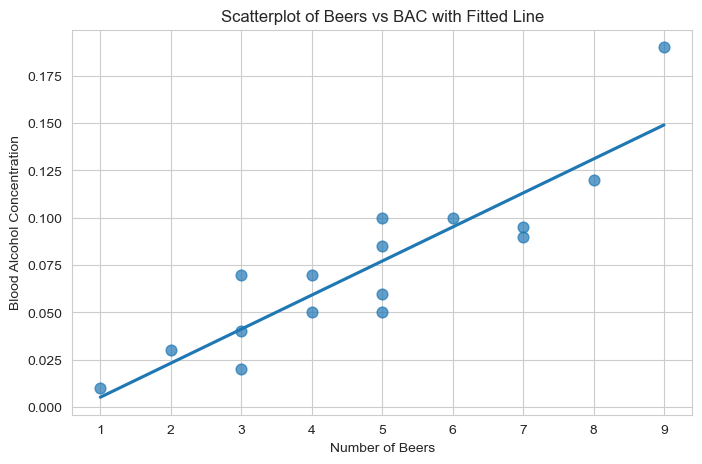

In [11]:
sns.regplot(x='beers', y='bac', data=df, ci=None, scatter_kws={'s':60, 'alpha':0.7})
plt.title('Scatterplot of Beers vs BAC with Fitted Line')
plt.xlabel('Number of Beers')
plt.ylabel('Blood Alcohol Concentration')
plt.show()

## Fit a Simple Linear Regression Model

We'll fit the model:   
bac = β₀ + β₁ × Beers + ε

**Question 5:** What is the estimated regression equation?  
**Question 6:** What is the R² value for the model?


In [13]:
model = ols('bac ~ beers', data=df).fit()
model.summary()

C:\Users\Pollo\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bac   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     55.94
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           2.97e-06
Time:                        20:47:05   Log-Likelihood:                 40.609
No. Observations:                  16   AIC:                            -77.22
Df Residuals:                      14   BIC:                            -75.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0127      0.013     -1.005      0.332      -0.040       0.014
beers          0.0180      0.002      7.480      0.000       0.013       0.023
==============================================================================
Omnibus:                        0.963   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.618   Jarque-Bera (JB):                0.859
Skew:                           0.470   Prob(JB):                        0.651
Kurtosis:                       2.364   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpret Regression Coefficients

**Question 7:** Interpret the slope (β₁) in context.  
**Question 8:** Interpret the intercept (β₀) in context.


## Predictions

Let's predict BAC for 4, 8, and 12 beers.

**Question 9:** What is the predicted BAC for 8 beers?


In [15]:
new_data = pd.DataFrame({'beers':[4,8,12]})
pred = model.get_prediction(new_data)
pred.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.059154,0.005470,0.047422,0.070887,0.013770,0.104539
1,0.131009,0.009204,0.111268,0.150751,0.082928,0.179091
2,0.202865,0.018003,0.164252,0.241477,0.144444,0.261285


Text(0, 0.5, 'Residuals')

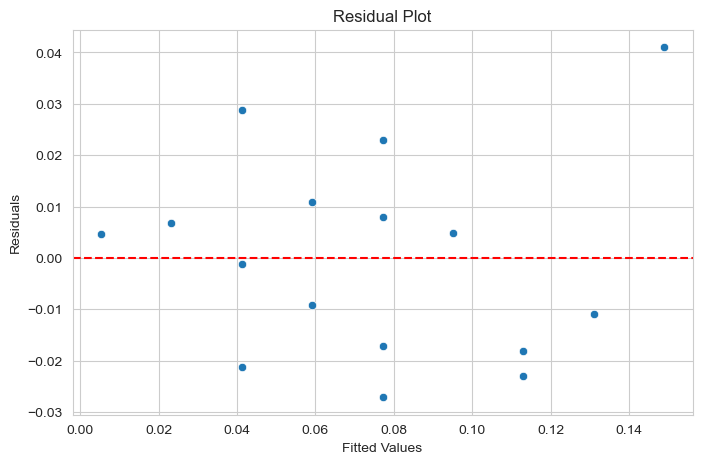

In [17]:
## Residual Plot and Diagnostics
residuals = model.resid
fitted = model.fittedvalues

sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
#plt.show()

## Reflection

**Question 10:** What does the R² value tell us about the strength of the relationship between beers and BAC?  
Write your answer in one or two sentences below.
